# MALIGNANT COMMENTS CLASSIFICATION

Problem Statement 

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive. Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. Data Set Description The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
Highly Malignant: It denotes comments that are highly malignant and hurtful.
Rude: It denotes comments that are very rude and offensive.
Threat: It contains indication of the comments that are giving any threat to someone.
Abuse: It is for comments that are abusive in nature.
Loathe: It describes the comments which are hateful and loathing in nature.
ID: It includes unique Ids associated with each comment text given.
Comment text: This column contains the comments extracted from various social media platforms. This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. You need to build a model that can differentiate between comments and its categories.
Refer to the data set file provided along with this.
abuse== Binary column with labels with abusive behaviour. loathe== Label to comments that are full of loathe and hatred.

There may be some comments which have multiple labels on them, i.e. some comments may be both malignant and loathe.

You are provided with a large number of comments which have been labeled by human raters for malignant behaviour.
The types are: Malignant Highly_malignant Rude Threat Abuse Loathe

You must create a model to predict a probability of each type of toxicity for each comment.

File Description
train.csv the training set which contains comments with their binary labels. test.csv The test set for which the predictions are to be done. It includes id and comments_text.

# Importing Libraries

In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int

#importing nlp library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc

# Load the dataset

In [2]:
df=pd.read_csv('Maligant_train.csv')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


Observations: 1)From dataset we can see that there are unnecessary columns are present like id. 2)Special Character are present. 3) No. of 159571 rows & No. of 8 columns are present in the dataset.

# Dimensions of Dataset

In [3]:
# check the no. of rows & column & finding the count of missing value
print(df.shape)
print("-"*60)
print(df.isna().sum())
print("-"*60)
#printing the summary of data type
df.info() 

(159571, 8)
------------------------------------------------------------
id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Observation :- No null values are present.

# Statistical Summary

In [4]:
# Lets understand data at high level check the stastics of dataset
df.describe(include='all')

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN
top,0000997932d777bf,Explanation\nWhy the edits made under my usern...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Observations:- 1) From Above graph we can see there are no data imbalance .2)No null values. 3)Objective type columns are present.

Also, we have seen that there are no null values lets check by visualization also for the null values.


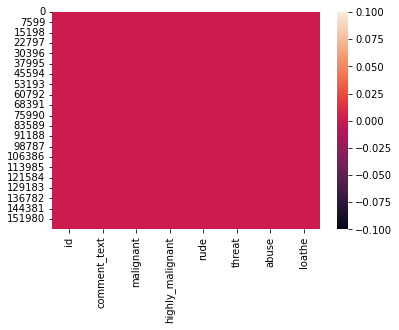

In [5]:
# Checking null value by plotting heatmap
sns.heatmap(df.isnull())
plt.show()

In [6]:
#first remove duplicates & recheck the size
df.drop_duplicates(inplace=True)

print(df.shape)

(159571, 8)


No. duplicates are found and deleated.

# EDA

# Data Pre-Processing

In [7]:
#Converting all capital letter into small letters
df['comment_text'] =df['comment_text'].str.lower()
df['comment_text']

0         explanation\nwhy the edits made under my usern...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm really not trying to edit war. it...
3         "\nmore\ni can't make any real suggestions on ...
4         you, sir, are my hero. any chance you remember...
                                ...                        
159566    ":::::and for the second time of asking, when ...
159567    you should be ashamed of yourself \n\nthat is ...
159568    spitzer \n\numm, theres no actual article for ...
159569    and it looks like it was actually you who put ...
159570    "\nand ... i really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [8]:
df.head(3)  # recheck the dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0


In [9]:
# Checking the text length before text preprocessing 
df['length']=df['comment_text'].str.len()
df['length']

0         264
1         112
2         233
3         622
4          67
         ... 
159566    295
159567     99
159568     81
159569    116
159570    189
Name: length, Length: 159571, dtype: int64

In [10]:
# Checking special characater if any
import string
alphabet = string.punctuation

# Storing the punctuation free text 
df['clean_comment_text']=df['comment_text'].apply(lambda x:"".join([i for i in x if i not in alphabet]))


In [11]:
df.head(3)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_comment_text
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264,explanation\nwhy the edits made under my usern...
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112,daww he matches this background colour im seem...
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233,hey man im really not trying to edit war its j...


In [12]:
# Checking the text length after removing special character 
df['str_re_length']=df['clean_comment_text'].str.len()
df['str_re_length']

0         254
1         100
2         227
3         601
4          62
         ... 
159566    277
159567     95
159568     77
159569    115
159570    175
Name: str_re_length, Length: 159571, dtype: int64

In [13]:
# Removing some special character
df['clean_comment_text'] = df['clean_comment_text'].str.replace("4", "")
df['clean_comment_text'] = df['clean_comment_text'].str.replace("\n", "")
df['clean_comment_text'] = df['clean_comment_text'].str.replace("2", "")

In [14]:
# Checking the text length after removing special character 
df['chr_length']=df['clean_comment_text'].str.len()
df['chr_length']

0         251
1          98
2         227
3         597
4          62
         ... 
159566    275
159567     92
159568     75
159569    115
159570    174
Name: chr_length, Length: 159571, dtype: int64

# Stop word removal

In [15]:
Stopwords = set(stopwords.words('english') + ['u', 'ü', 'ur','im', 'dont', 'doin', 'ure'])

df['clean_comment_text']=df['clean_comment_text'].apply(lambda x:' '.join(term for term in x.split() if term not in Stopwords))

In [16]:
df['new_length']=df['clean_comment_text'].str.len()
df['new_length']

0         179
1          81
2         141
3         388
4          35
         ... 
159566    186
159567     45
159568     66
159569     57
159570    110
Name: new_length, Length: 159571, dtype: int64

In [17]:
df.head(3)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_comment_text,str_re_length,chr_length,new_length
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264,explanationwhy edits made username hardcore me...,254,251,179
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112,daww matches background colour seemingly stuck...,100,98,81
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233,hey man really trying edit war guy constantly ...,227,227,141


# Data Visualisation

# Univariate Plots

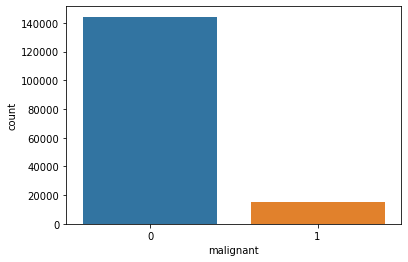

0    144277
1     15294
Name: malignant, dtype: int64


In [18]:
#plot each class frequency
sns.countplot(x='malignant',data=df)
plt.show()
print(df['malignant'].value_counts())

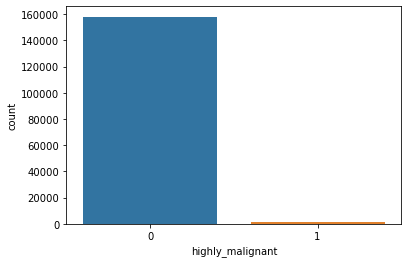

0    157976
1      1595
Name: highly_malignant, dtype: int64


In [19]:
#plot each class frequency
sns.countplot(x='highly_malignant',data=df)
plt.show()
print(df['highly_malignant'].value_counts())

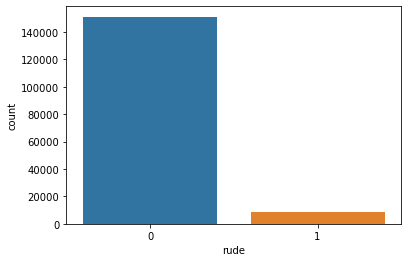

0    151122
1      8449
Name: rude, dtype: int64


In [20]:
#plot each class frequency
sns.countplot(x='rude',data=df)
plt.show()
print(df['rude'].value_counts())

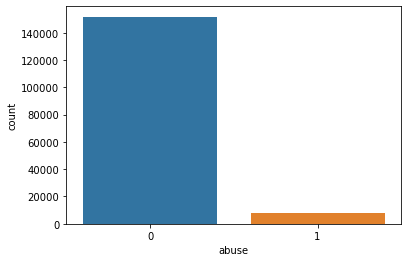

0    151694
1      7877
Name: abuse, dtype: int64


In [21]:
#plot each class frequency
sns.countplot(x='abuse',data=df)
plt.show()
print(df['abuse'].value_counts())

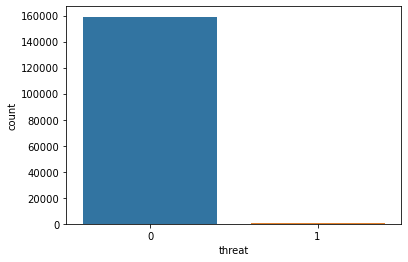

0    159093
1       478
Name: threat, dtype: int64


In [22]:
#plot each class frequency
sns.countplot(x='threat',data=df)
plt.show()
print(df['threat'].value_counts())

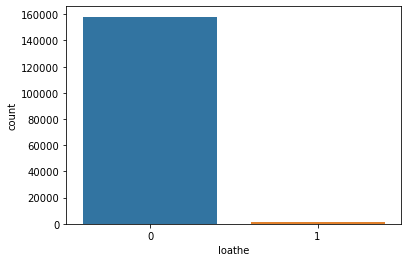

0    158166
1      1405
Name: loathe, dtype: int64


In [23]:
#plot each class frequency
sns.countplot(x='loathe',data=df)
plt.show()
print(df['loathe'].value_counts())

In [24]:
print(df[['loathe','highly_malignant','rude','threat','abuse']].groupby(df['malignant']).value_counts())

malignant  loathe  highly_malignant  rude  threat  abuse
0          0       0                 0     0       0        143346
                                     1     0       0           317
                                     0     0       1           301
                                     1     0       1           181
           1       0                 0     0       0            54
                                                   1            28
           0       0                 0     1       0            22
           1       0                 1     0       1            18
                                                   0             3
           0       0                 0     1       1             3
                                     1     1       1             2
                                                   0             2
1          0       0                 0     0       0          5666
                                     1     0       1          3800
     

As we see ther are some comments which have multiple labels on them, i.e. some comments may be both malignant and loathe.etc.

In [25]:
df.drop(columns='comment_text', inplace=True)

# Bivariate Plot

In [26]:
df.head(3)

,id,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_comment_text,str_re_length,chr_length,new_length
0,0000997932d777bf,0,0,0,0,0,0,264,explanationwhy edits made username hardcore me...,254,251,179
1,000103f0d9cfb60f,0,0,0,0,0,0,112,daww matches background colour seemingly stuck...,100,98,81
2,000113f07ec002fd,0,0,0,0,0,0,233,hey man really trying edit war guy constantly ...,227,227,141


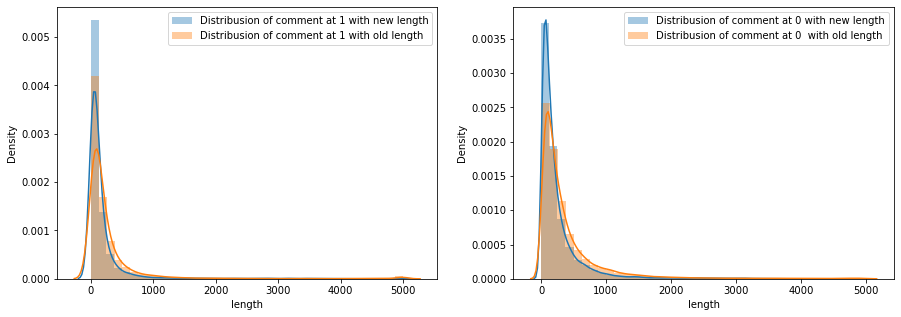

In [27]:
#Bivariant graph
f,ax=plt.subplots(1,2, figsize =(15, 5))
sns.distplot(df[df['malignant']==1]['new_length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with new length').legend()
sns.distplot(df[df['malignant']==0]['new_length'], ax=ax[1], bins=40,label='Distribusion of comment at 0 with new length').legend()
sns.distplot(df[df['malignant']==1]['length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with old length').legend()
sns.distplot(df[df['malignant']==0]['length'], ax=ax[1], bins=40,label='Distribusion of comment at 0  with old length').legend()
plt.show()

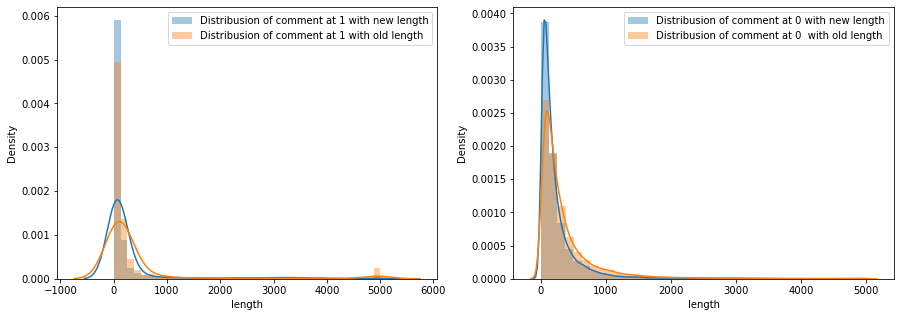

In [28]:
#Bivariant graph
f,ax=plt.subplots(1,2, figsize =(15, 5))
sns.distplot(df[df['highly_malignant']==1]['new_length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with new length').legend()
sns.distplot(df[df['highly_malignant']==0]['new_length'], ax=ax[1], bins=40,label='Distribusion of comment at 0 with new length').legend()
sns.distplot(df[df['highly_malignant']==1]['length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with old length').legend()
sns.distplot(df[df['highly_malignant']==0]['length'], ax=ax[1], bins=40,label='Distribusion of comment at 0  with old length').legend()
plt.show()

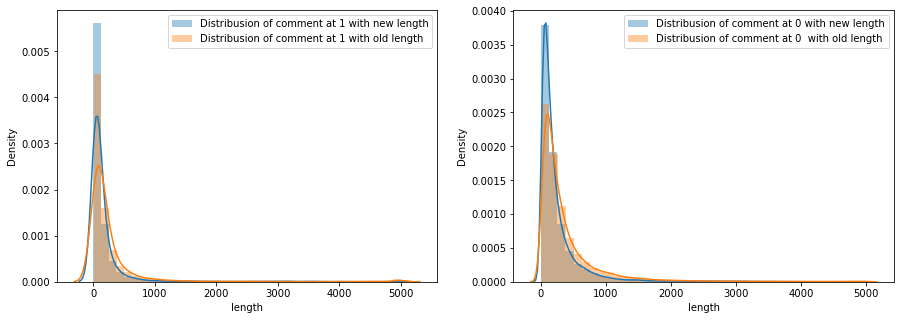

In [29]:
#Bivariant graph
f,ax=plt.subplots(1,2, figsize =(15, 5))
sns.distplot(df[df['rude']==1]['new_length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with new length').legend()
sns.distplot(df[df['rude']==0]['new_length'], ax=ax[1], bins=40,label='Distribusion of comment at 0 with new length').legend()
sns.distplot(df[df['rude']==1]['length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with old length').legend()
sns.distplot(df[df['rude']==0]['length'], ax=ax[1], bins=40,label='Distribusion of comment at 0  with old length').legend()
plt.show()

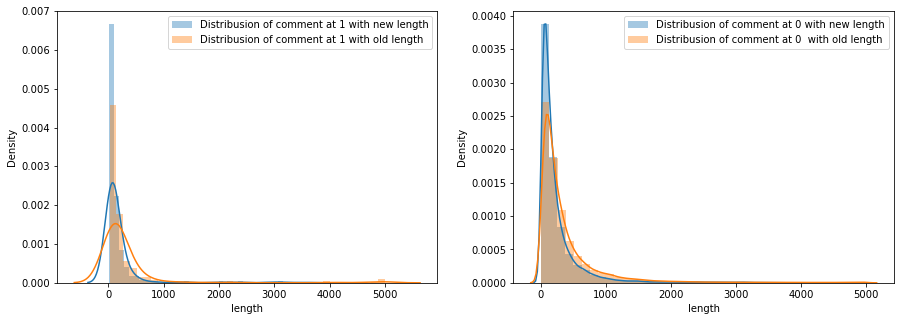

In [30]:
#Bivariant graph
f,ax=plt.subplots(1,2, figsize =(15, 5))
sns.distplot(df[df['threat']==1]['new_length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with new length').legend()
sns.distplot(df[df['threat']==0]['new_length'], ax=ax[1], bins=40,label='Distribusion of comment at 0 with new length').legend()
sns.distplot(df[df['threat']==1]['length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with old length').legend()
sns.distplot(df[df['threat']==0]['length'], ax=ax[1], bins=40,label='Distribusion of comment at 0  with old length').legend()
plt.show()

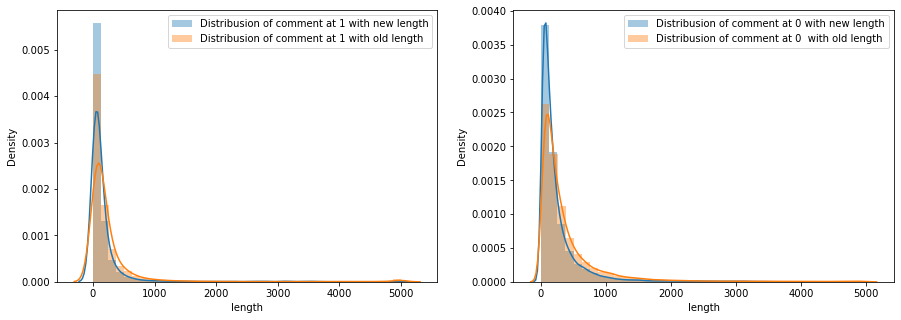

In [31]:
#Bivariant graph
f,ax=plt.subplots(1,2, figsize =(15, 5))
sns.distplot(df[df['abuse']==1]['new_length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with new length').legend()
sns.distplot(df[df['abuse']==0]['new_length'], ax=ax[1], bins=40,label='Distribusion of comment at 0 with new length').legend()
sns.distplot(df[df['abuse']==1]['length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with old length').legend()
sns.distplot(df[df['abuse']==0]['length'], ax=ax[1], bins=40,label='Distribusion of comment at 0  with old length').legend()
plt.show()

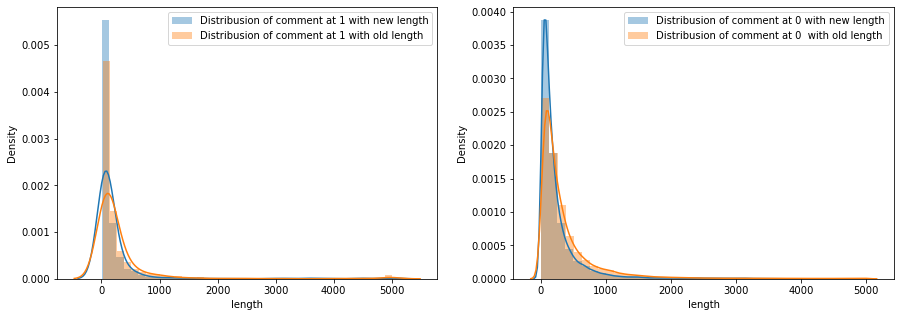

In [32]:
#Bivariant graph
f,ax=plt.subplots(1,2, figsize =(15, 5))
sns.distplot(df[df['loathe']==1]['new_length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with new length').legend()
sns.distplot(df[df['loathe']==0]['new_length'], ax=ax[1], bins=40,label='Distribusion of comment at 0 with new length').legend()
sns.distplot(df[df['loathe']==1]['length'], ax=ax[0], bins=40, label='Distribusion of comment at 1 with old length').legend()
sns.distplot(df[df['loathe']==0]['length'], ax=ax[1], bins=40,label='Distribusion of comment at 0  with old length').legend()
plt.show()

# Lets Check Correlation

In [33]:
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe,length,str_re_length,chr_length,new_length
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,-0.054413,-0.055664,-0.055868,-0.051310
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.010175,0.008114,0.008017,0.014845
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,-0.042910,-0.043699,-0.043900,-0.038972
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,-0.007917,-0.009362,-0.009398,-0.010067
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,-0.045027,-0.045764,-0.045918,-0.041729
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,-0.013628,-0.013477,-0.013582,-0.008112
length,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,1.000000,0.998731,0.998583,0.989935
str_re_length,-0.055664,0.008114,-0.043699,-0.009362,-0.045764,-0.013477,0.998731,1.000000,0.999943,0.990516
chr_length,-0.055868,0.008017,-0.043900,-0.009398,-0.045918,-0.013582,0.998583,0.999943,1.000000,0.990221
new_length,-0.051310,0.014845,-0.038972,-0.010067,-0.041729,-0.008112,0.989935,0.990516,0.990221,1.000000


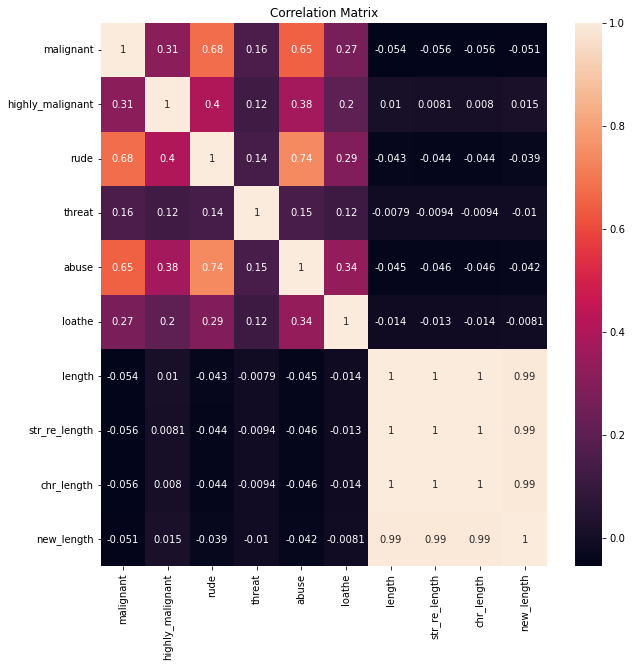

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix")
plt.savefig('Colinearity.png')
plt.show()

In [35]:
# Check correlation with target variable
df.corr()['malignant'].sort_values(ascending = False)

malignant           1.000000
rude                0.676515
abuse               0.647518
highly_malignant    0.308619
loathe              0.266009
threat              0.157058
new_length         -0.051310
length             -0.054413
str_re_length      -0.055664
chr_length         -0.055868
Name: malignant, dtype: float64

As we seen there are many target variable so lets gruop them into one for better prediction.

In [36]:
# Adding the all target variable with one column
df['total_malignant']=df[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse','loathe']].sum(axis=1).astype(int)

In [37]:
df['total_malignant'].value_counts() #lets check the count for each class

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: total_malignant, dtype: int64

In [38]:
# Lets convert each class in to 1 & 0 as target variable
df['total_malignant']=df['total_malignant']>0
df['total_malignant'].value_counts() #lets check the count for each class

False    143346
True      16225
Name: total_malignant, dtype: int64

In [40]:
df['total_malignant']=df['total_malignant'].astype(int)
df['total_malignant'].value_counts()

0    143346
1     16225
Name: total_malignant, dtype: int64

# Encoding text

In [41]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=df.columns.values.tolist()
for i in features:
    if df[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['id', 'clean_comment_text']

In [42]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
for i in cat_col:
    data=label.fit_transform(df[i])
    pd.Series(data)
    df[i]=data

In [43]:
df.head(3)

,id,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_comment_text,str_re_length,chr_length,new_length,total_malignant
0,0,0,0,0,0,0,0,264,40962,254,251,179,0
1,1,0,0,0,0,0,0,112,30887,100,98,81,0
2,2,0,0,0,0,0,0,233,56249,227,227,141,0


In [44]:
# Divide the dataset into features & target variable for further treatment
x=df[['id','clean_comment_text']]
y=df['total_malignant']

In [45]:
print(x.shape,y.shape)

(159571, 2) (159571,)


In [46]:
y.value_counts() # As we see the dataimbalance in target variable so lets use SMOTE resampling tech to build the better model 

0    143346
1     16225
Name: total_malignant, dtype: int64

# Find the best Random state

In [47]:
# Lets select the proper random state to build best model by using LogisticRegression

from sklearn.linear_model import LogisticRegression

acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= i )
    
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    
    y_pred=lr.predict(x_train) # prediction on train data
    r1 =accuracy_score(y_train,y_pred) # accuracy check on train data
    
    pred = lr.predict(x_test)   #prediction on test data
    r2 =accuracy_score(y_test,pred) #accuracy check on test data
    
    if r2 > acc_score_test and r1 > acc_score_train: # selecting max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

at random sate 1, the training accuracy is:- 0.8988285232039306
at random sate 1, the testing accuracy is:- 0.8967989371568947


at random sate 2, the training accuracy is:- 0.8988285232039306
at random sate 2, the testing accuracy is:- 0.8967989371568947


at random sate 3, the training accuracy is:- 0.8988285232039306
at random sate 3, the testing accuracy is:- 0.8967989371568947


at random sate 4, the training accuracy is:- 0.8988285232039306
at random sate 4, the testing accuracy is:- 0.8967989371568947


at random sate 5, the training accuracy is:- 0.8988285232039306
at random sate 5, the testing accuracy is:- 0.8967989371568947


at random sate 6, the training accuracy is:- 0.8988285232039306
at random sate 6, the testing accuracy is:- 0.8967989371568947


at random sate 7, the training accuracy is:- 0.8988285232039306
at random sate 7, the testing accuracy is:- 0.8967989371568947


at random sate 8, the training accuracy is:- 0.8988285232039306
at random sate 8, the testing acc

at random sate 65, the training accuracy is:- 0.8988285232039306
at random sate 65, the testing accuracy is:- 0.8967989371568947


at random sate 66, the training accuracy is:- 0.8988285232039306
at random sate 66, the testing accuracy is:- 0.8967989371568947


at random sate 67, the training accuracy is:- 0.8988285232039306
at random sate 67, the testing accuracy is:- 0.8967989371568947


at random sate 68, the training accuracy is:- 0.8988285232039306
at random sate 68, the testing accuracy is:- 0.8967989371568947


at random sate 69, the training accuracy is:- 0.8988285232039306
at random sate 69, the testing accuracy is:- 0.8967989371568947


at random sate 70, the training accuracy is:- 0.8988285232039306
at random sate 70, the testing accuracy is:- 0.8967989371568947


at random sate 71, the training accuracy is:- 0.8988285232039306
at random sate 71, the testing accuracy is:- 0.8967989371568947


at random sate 72, the training accuracy is:- 0.8988285232039306
at random sate 72,

at random sate 129, the training accuracy is:- 0.8988285232039306
at random sate 129, the testing accuracy is:- 0.8967989371568947


at random sate 130, the training accuracy is:- 0.8988285232039306
at random sate 130, the testing accuracy is:- 0.8967989371568947


at random sate 131, the training accuracy is:- 0.8988285232039306
at random sate 131, the testing accuracy is:- 0.8967989371568947


at random sate 132, the training accuracy is:- 0.8988285232039306
at random sate 132, the testing accuracy is:- 0.8967989371568947


at random sate 133, the training accuracy is:- 0.8988285232039306
at random sate 133, the testing accuracy is:- 0.8967989371568947


at random sate 134, the training accuracy is:- 0.8988285232039306
at random sate 134, the testing accuracy is:- 0.8967989371568947


at random sate 135, the training accuracy is:- 0.8988285232039306
at random sate 135, the testing accuracy is:- 0.8967989371568947


at random sate 136, the training accuracy is:- 0.8988285232039306
at 

at random sate 191, the training accuracy is:- 0.8988285232039306
at random sate 191, the testing accuracy is:- 0.8967989371568947


at random sate 192, the training accuracy is:- 0.8988285232039306
at random sate 192, the testing accuracy is:- 0.8967989371568947


at random sate 193, the training accuracy is:- 0.8988285232039306
at random sate 193, the testing accuracy is:- 0.8967989371568947


at random sate 194, the training accuracy is:- 0.8988285232039306
at random sate 194, the testing accuracy is:- 0.8967989371568947


at random sate 195, the training accuracy is:- 0.8988285232039306
at random sate 195, the testing accuracy is:- 0.8967989371568947


at random sate 196, the training accuracy is:- 0.8988285232039306
at random sate 196, the testing accuracy is:- 0.8967989371568947


at random sate 197, the training accuracy is:- 0.8988285232039306
at random sate 197, the testing accuracy is:- 0.8967989371568947


at random sate 198, the training accuracy is:- 0.8988285232039306
at 

In [48]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 1


In [52]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state= rand_state )
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(111699, 2)
(47872, 2)
(111699,)
(47872,)


In [53]:
# We have imbalance dataset lets use SMOTE
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(0.90) # selecting 90% data for resampling
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 100443, 1: 11256})
Counter({0: 100443, 1: 90398})


# Lets build the model to predict the Malignant comment 

In [55]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()

import xgboost as xgb
xgb=xgb.XGBClassifier()

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve, auc

models=[]
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', dt))
models.append(('AdaBoostClassifier', ada))
models.append(('GradientBoostingClassifier', gb))
models.append(('RandomForestClassifier', rfc))
models.append(('XGBClassifier', xgb))
models.append(('KNeighborsClassifier', knn))

*********************** LogisticRegression ***********************
LogisticRegression()
Train Report: 0.5263177199867953
Test Report: 0.8962023729946524
Classification Report:               precision    recall  f1-score   support

           0       0.90      1.00      0.95     42903
           1       0.00      0.00      0.00      4969

    accuracy                           0.90     47872
   macro avg       0.45      0.50      0.47     47872
weighted avg       0.80      0.90      0.85     47872

Confusion Matrix: [[42903     0]
 [ 4969     0]]
Accuracy: 52.63 %
Standard Deviation: 0.00 %


*********************** DecisionTreeClassifier ***********************
DecisionTreeClassifier()
Train Report: 1.0
Test Report: 0.7071983622994652
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.74      0.82     42903
           1       0.16      0.44      0.24      4969

    accuracy                           0.71     47872
   macro avg  

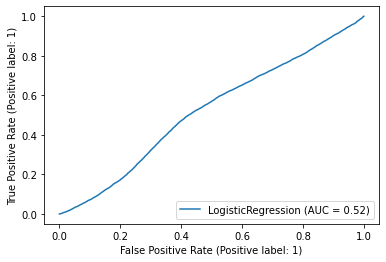

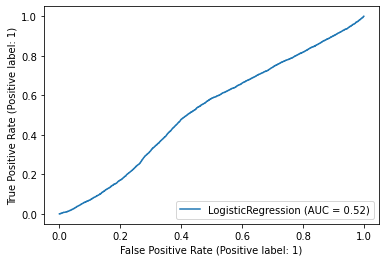

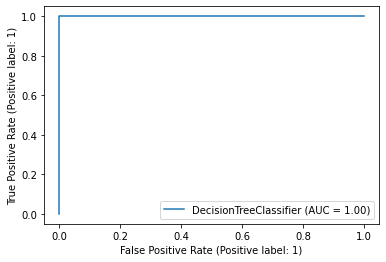

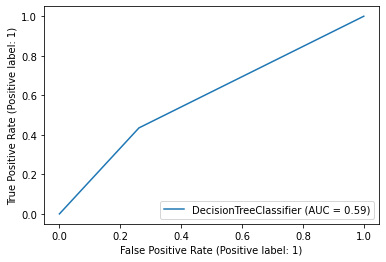

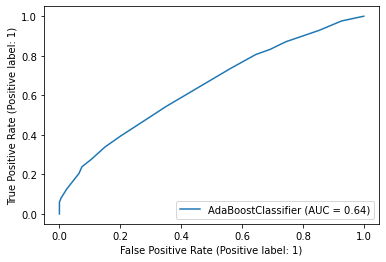

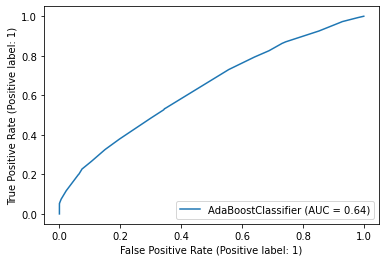

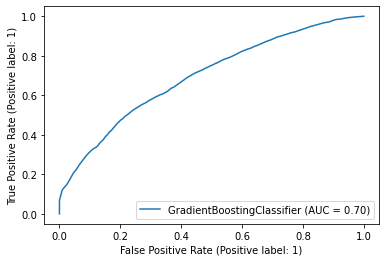

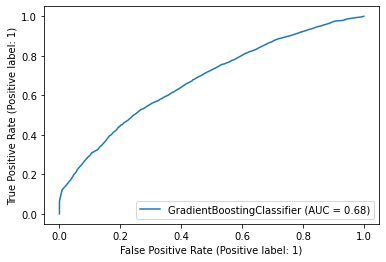

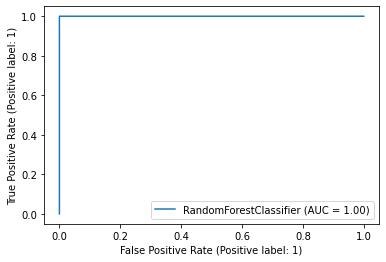

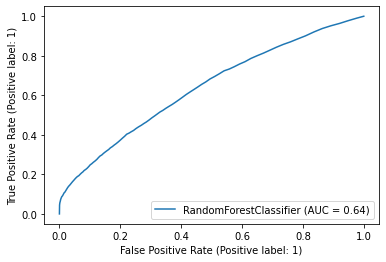

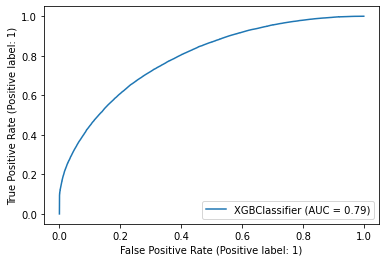

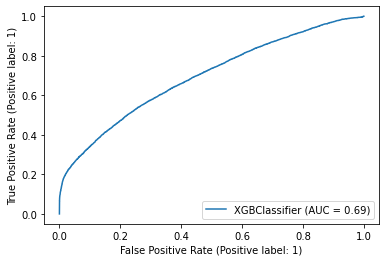

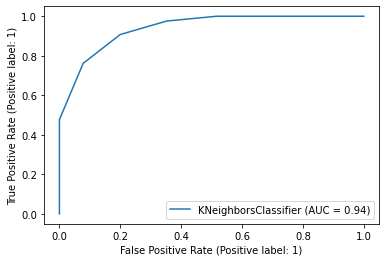

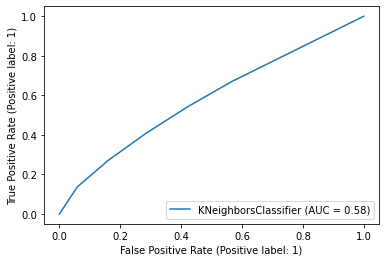

In [56]:
m=[]
score=[]
score2=[]
cv_score=[]
roc_trainscore=[]
roc_testscore=[]
for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train_ns, y_train_ns)
    print(model)
    y_pred=model.predict(x_train_ns)
    AS=accuracy_score(y_train_ns,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)
    
    pred=model.predict(x_test)
    AS2=accuracy_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    CR=classification_report(y_test,pred)
    print("Classification Report:",CR)
    CM=confusion_matrix(y_test,pred)
    print("Confusion Matrix:", CM)
    
    accuracies= cross_val_score(model, x_train_ns, y_train_ns, cv=2, scoring='accuracy')
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('\n')
    plot_roc_curve(model,x_train_ns,y_train_ns)
    auc = metrics.roc_auc_score(y_train_ns,y_pred) #calculate AUC of model
    roc_trainscore.append(auc*100)  #print AUC score
    
    plot_roc_curve(model,x_test, y_test)
    auc1 = metrics.roc_auc_score(y_test, pred) #calculate AUC of model
    roc_testscore.append(auc1*100) #print AUC score

In [57]:
print(len(m),len(score),len(score2),len(cv_score),len(roc_trainscore),len(roc_testscore))

7 7 7 7 7 7


In [58]:
# Collecting all accuracies to 
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score,'Roc_auc_trainScore':roc_trainscore,'Roc_auc_testScore':roc_testscore})
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,Roc_auc_trainScore,Roc_auc_testScore
0,LogisticRegression,52.631772,89.620237,52.631772,50.000000,50.000000
1,DecisionTreeClassifier,100.000000,70.719836,70.863177,100.000000,58.690526
2,AdaBoostClassifier,60.714941,75.749916,60.673545,59.645092,59.067984
3,GradientBoostingClassifier,63.666613,78.469669,63.073975,62.594648,61.519542
4,RandomForestClassifier,99.998428,74.507019,75.725344,99.998341,58.926172
5,XGBClassifier,71.091118,73.493900,67.700336,70.693131,63.885960
6,KNeighborsClassifier,85.101210,68.361464,74.535346,85.383604,56.164779


# Looking at the accuracy and ROC curve i m selecting XGBClassifier lets get better accuracy by hyper tuning parameter

# HyperParameter Tuning

In [59]:
# Hyper tuning by using RandomizedSearchCV With XGB
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':[15,10,12],'gamma':[0.25,0.001,0.3,0.092],'max_depth':[25,20,11,21,8,9],'random_state':[20,10,30]}
rand=RandomizedSearchCV(estimator=xgb, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 20, 'n_estimators': 10, 'max_depth': 11, 'gamma': 0.092}

Train Report: 94.45716591298515
Test Report: 74.04745989304813
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.78      0.84     42903
           1       0.18      0.44      0.26      4969

    accuracy                           0.74     47872
   macro avg       0.55      0.61      0.55     47872
weighted avg       0.85      0.74      0.78     47872

Confusion Matrix: [[33272  9631]
 [ 2793  2176]]
Accuracy: 73.64 %
Standard Deviation: 0.03 %
roc_auc_train 94.4511150896557
roc_auc_test 60.6715968539007


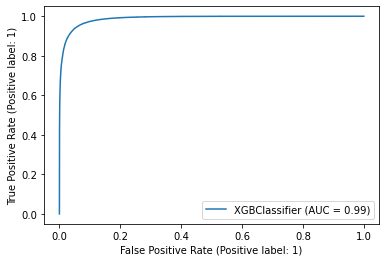

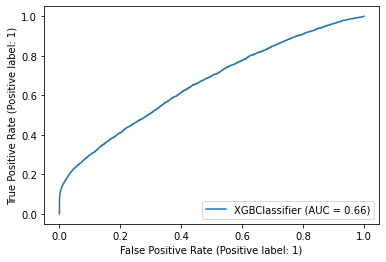

In [76]:
#Model no.5
import xgboost as xgb

xgb=xgb.XGBClassifier(random_state=20, n_estimators= 15, max_depth= 25, gamma= 0.001)

xgb.fit(x_train_ns,y_train_ns)
y_pred=xgb.predict(x_train_ns)
AS=accuracy_score(y_train_ns,y_pred)
print("Train Report:",AS*100) 
pred=xgb.predict(x_test)
AS2=accuracy_score(y_test,pred)
print("Test Report:",AS2*100)
CR=classification_report(y_test,pred)
print("Classification Report:",CR)
CM=confusion_matrix(y_test,pred)
print("Confusion Matrix:", CM)
    
accuracies= cross_val_score(xgb, x_train_ns, y_train_ns, cv=2, scoring='accuracy')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

plot_roc_curve(xgb,x_train_ns,y_train_ns)
auc = metrics.roc_auc_score(y_train_ns,y_pred) #calculate AUC of model
print('roc_auc_train',auc*100)  #print AUC score
    
plot_roc_curve(xgb,x_test, y_test)
auc1 = metrics.roc_auc_score(y_test, pred) #calculate AUC of model
print('roc_auc_test',auc1*100) #print AUC score

In [78]:
# Hyper tuning by using GridSearchCV

from sklearn.model_selection import GridSearchCV

para={'max_depth':[20,3,40,6,10],'random_state':[41,35,56,300],'n_estimators':[20,30,7]}
grid=GridSearchCV(estimator=xgb, param_grid=para,cv=2)
grid.fit(x_train,y_train)

print(grid.best_params_)

{'max_depth': 10, 'n_estimators': 20, 'random_state': 41}


Train Report: 92.53724304525757
Test Report: 74.0161263368984
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.77      0.84     42903
           1       0.19      0.44      0.26      4969

    accuracy                           0.74     47872
   macro avg       0.55      0.61      0.55     47872
weighted avg       0.85      0.74      0.78     47872

Confusion Matrix: [[33238  9665]
 [ 2774  2195]]
Accuracy: 73.38 %
Standard Deviation: 0.01 %
roc_auc_train 92.5199949480114
roc_auc_test 60.823157934366364


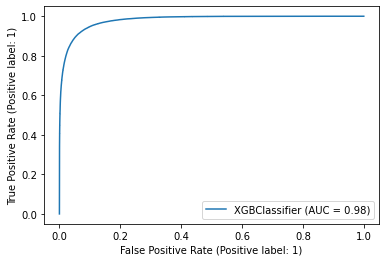

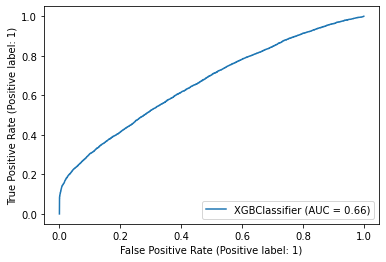

In [81]:
#Model no.5
import xgboost as xgb

xgb=xgb.XGBClassifier(random_state=41, n_estimators= 20, max_depth= 22)

xgb.fit(x_train_ns,y_train_ns)
y_pred=xgb.predict(x_train_ns)
AS=accuracy_score(y_train_ns,y_pred)
print("Train Report:",AS*100) 
pred=xgb.predict(x_test)
AS2=accuracy_score(y_test,pred)
print("Test Report:",AS2*100)
CR=classification_report(y_test,pred)
print("Classification Report:",CR)
CM=confusion_matrix(y_test,pred)
print("Confusion Matrix:", CM)
    
accuracies= cross_val_score(xgb, x_train_ns, y_train_ns, cv=2, scoring='accuracy')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

plot_roc_curve(xgb,x_train_ns,y_train_ns)
auc = metrics.roc_auc_score(y_train_ns,y_pred) #calculate AUC of model
print('roc_auc_train',auc*100)  #print AUC score
    
plot_roc_curve(xgb,x_test, y_test)
auc1 = metrics.roc_auc_score(y_test, pred) #calculate AUC of model
print('roc_auc_test',auc1*100) #print AUC score

# After doing both hypertuning parameter and also looking at the accuracy , roc curve & after cross validation i m selecting the XGBClassifier with RandomizedSearchCV classifier is the best model with accuracy 73.64%.

In [83]:
#save model
import pickle
Filename='Finalized_model_Malignant_Comments.pickle'
pickle.dump(xgb,open(Filename,'wb'))

# Lets Predict the Malignant comments for the test data by selected model

In [90]:
df1=pd.read_csv('Maligant_test.csv')  # read the data
df1

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [91]:
# check the no. of rows & column & finding the count of missing value
print(df1.shape)
print("-"*60)
print(df1.isna().sum())
print("-"*60)
#printing the summary of data type
print(df1.info())
#first remove duplicates & recheck the size
df1.drop_duplicates(inplace=True)
print(df1.shape)
#Converting all capital letter into small letters
df1['comment_text'] =df1['comment_text'].str.lower()

(153164, 2)
------------------------------------------------------------
id              0
comment_text    0
dtype: int64
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None
(153164, 2)


In [92]:
# Checking the text length before text preprocessing 
df1['length']=df1['comment_text'].str.len()
# Checking special characater if any
import string
alphabet = string.punctuation
# Storing the punctuation free text 
df1['clean_comment_text']=df1['comment_text'].apply(lambda x:"".join([i for i in x if i not in alphabet]))
# Checking the text length after removing special character 
df1['str_re_length']=df1['clean_comment_text'].str.len()
# Removing some special character
df1['clean_comment_text'] = df1['clean_comment_text'].str.replace("4", "")
df1['clean_comment_text'] = df1['clean_comment_text'].str.replace("\n", "")
df1['clean_comment_text'] = df1['clean_comment_text'].str.replace("2", "")
# Checking the text length after removing special character 
df1['chr_length']=df1['clean_comment_text'].str.len()
Stopwords = set(stopwords.words('english') + ['u', 'ü', 'ur','im', 'dont', 'doin', 'ure'])
df1['clean_comment_text']=df1['clean_comment_text'].apply(lambda x:' '.join(term for term in x.split() if term not in Stopwords))
df1['new_length']=df1['clean_comment_text'].str.len()
df1.drop(columns='comment_text', inplace=True)
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=df1.columns.values.tolist()
for i in features:
    if df1[i].dtype in numerics:
        continue
    cat_col.append(i)
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
for i in cat_col:
    data=label.fit_transform(df1[i])
    pd.Series(data)
    df1[i]=data

In [95]:
df1["predictions"] = df1[['clean_comment_text','id']].apply(lambda s: dt.predict(s.values[None])[0], axis=1)

In [97]:
df1["predictions"].value_counts()

0    111725
1     41439
Name: predictions, dtype: int64

In [98]:
df1["predictions"]

0         0
1         0
2         0
3         0
4         0
         ..
153159    0
153160    1
153161    0
153162    0
153163    0
Name: predictions, Length: 153164, dtype: int32